In [1]:
import random
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import load_model

In [2]:
mnist.load_data()[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [3]:
(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

In [4]:
print("Shape of Train Images", train_images.shape)
print("Shape of Test Images", test_images.shape)
# Shape of Train Images (60000, 28, 28)
# Shape of Test Images (10000, 28, 28)

Shape of Train Images (60000, 28, 28)
Shape of Test Images (10000, 28, 28)


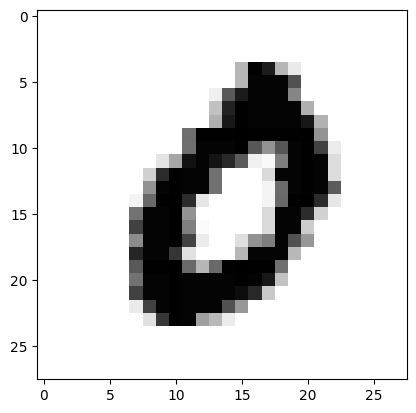

In [5]:
plt.imshow(train_images[37], cmap="gray_r")
plt.show()

In [6]:
"""
1. 3D --> 4D Numpy Array
2. Normalization: /255

"""

# 3D --> 4D Numpy Array
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print("Shape of Train Images", train_images.shape)
print("Shape of Test Images", test_images.shape)


# Normalization: /255
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255

Shape of Train Images (60000, 28, 28, 1)
Shape of Test Images (10000, 28, 28, 1)


In [7]:
input_shape = (28,28,1)

In [8]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x = train_images,
                    y = train_labels,
                    epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8888 - loss: 0.3623
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9731 - loss: 0.0893
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9812 - loss: 0.0586
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9859 - loss: 0.0433
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9882 - loss: 0.0352
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9905 - loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9920 - loss: 0.0226
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9933 - loss: 0.0193
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9941 - loss: 0.0168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9949 - loss: 0.0150


In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0697
Test Loss:  0.05372130870819092
Test Accuracy:  0.9858999848365784


In [13]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
history_dict = history.history
print("Keys: ", history_dict.keys())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.0697
Test Loss:  0.05372130870819092
Test Accuracy:  0.9858999848365784
Keys:  dict_keys(['accuracy', 'loss'])


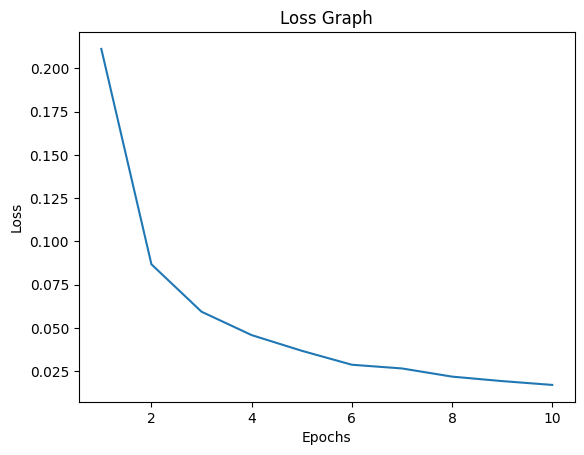

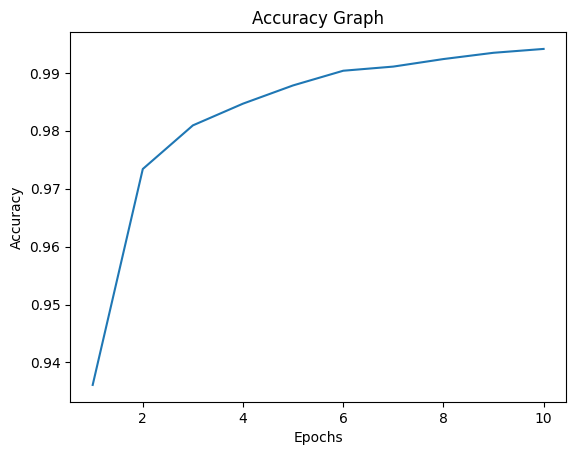

In [14]:
# loss, accuracy graph
epochs = range(1,11)
loss = history_dict["loss"]
accuracy = history_dict["accuracy"]

plt.plot(epochs, loss)
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs, accuracy)
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Number:  5


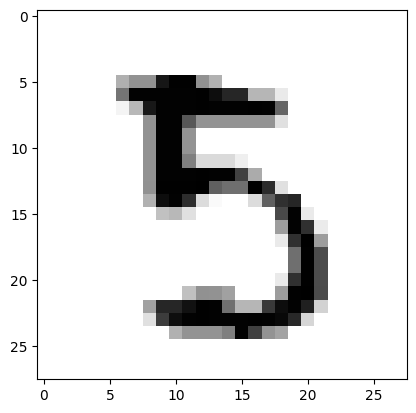

In [15]:

i = random.randint(1,5000)
prediction = model.predict(test_images[i].reshape(1,28,28,1))
print("Predicted Number: ",prediction.argmax())
plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()